In [1]:
from fairness_sdk.data_preparation import RAFDB_loader_api
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Chargement des données de RAF-DB
### 1. 1 Définition des constantes (chemin de la BD, dimensions, etc.)# I. Data preprocessing

In [2]:
FEATURES_PATH = '/export/livia/home/datasets/RAF/basic/Image/aligned/'
ANNOTATIONS_PATH = '/export/livia/home/datasets/RAF/basic/Annotation/manual/Landmarks_5/'
LABELS_PATH = '/export/livia/home/datasets/RAF/basic/EmoLabel/list_patition_label.txt'
img_rows, img_cols, img_channels, num_classes = 224, 224, 3, 7

### 1. 2 Chargement des données de test

In [3]:
data = RAFDB_loader_api(FEATURES_PATH, ANNOTATIONS_PATH, LABELS_PATH, False)

In [4]:
# Combine the subgroups into a single dataset
test_images = np.concatenate((data['images_gender']['male'], data['images_gender']['female'], data['images_race']['caucasian'], data['images_race']['asian'], data['images_race']['african']), axis=0)
test_labels = np.concatenate((data['labels_gender']['male'], data['labels_gender']['female'], data['labels_race']['caucasian'], data['labels_race']['asian'], data['labels_race']['african']), axis=0)

In [34]:
vanilla_VGG19 = keras.models.load_model('checkpointsv2/best_vanilla_VGG19.h5')

In [35]:
fine_tuned_VGG19 = keras.models.load_model('checkpointsv2/best_fine_tuned_VGG19.h5')

In [36]:
augmented_VGG19 = keras.models.load_model('checkpointsv2/best_augmented_VGG19.h5')

In [37]:
augmented_balanced_VGG19 = keras.models.load_model('checkpoints/best_aumented_balanced_VGG19.h5')

In [5]:
vanilla_resnet152 = keras.models.load_model('checkpointsv2/best_vanilla_ResNet152.h5')
fine_tuned_resnet152 = keras.models.load_model('checkpointsv2/best_fine_tuned_ResNet152.h5')
fine_tuned_augmented_resnet152 = keras.models.load_model('checkpointsv2/Fine-Tuned_Augmented_ResNet152.h5')
fine_tuned_augmented_balanced_resnet152 = keras.models.load_model('checkpointsv2/best_aumented_balanced_ResNet152.h5')

## 3. Chargement des variantes de ResNet152

In [6]:
models = {
            'ResNet152': vanilla_resnet152,
            'Fine tuned ResNet152': fine_tuned_resnet152,
            'Fine tuned and Augmented ResNnet152': fine_tuned_augmented_resnet152,
            'Fine tuned Augmented and Balanced ResNet152' : fine_tuned_augmented_balanced_resnet152
         }

In [38]:
models = {
            'VGG19' : vanilla_VGG19,
            'Fine tuned VGG19' : fine_tuned_VGG19,
            'Fine tuned and Augmented VGG19' : augmented_VGG19,
            'Fine tuned Augmented and Balanced VGG19' : augmented_balanced_VGG19
         }

## 4. Test des modèles sur l'ensemble de la base de test

In [7]:
# Initialize accuracy dict (for each model)
accs = {}

In [8]:
for model_name, model_ in models.items():
    test_loss, test_acc = model_.evaluate(test_images, test_labels, verbose=0)
    accs[model_name] = test_acc

In [9]:
### 4. Printing accuracy of the models accross all the test set

In [10]:
accs

{'ResNet152': 0.6564537286758423,
 'Fine tuned ResNet152': 0.6567796468734741,
 'Fine tuned and Augmented ResNnet152': 0.6825293302536011,
 'Fine tuned Augmented and Balanced ResNet152': 0.691329836845398}

## 5. Visualisation des performances (exactitude) des modèles

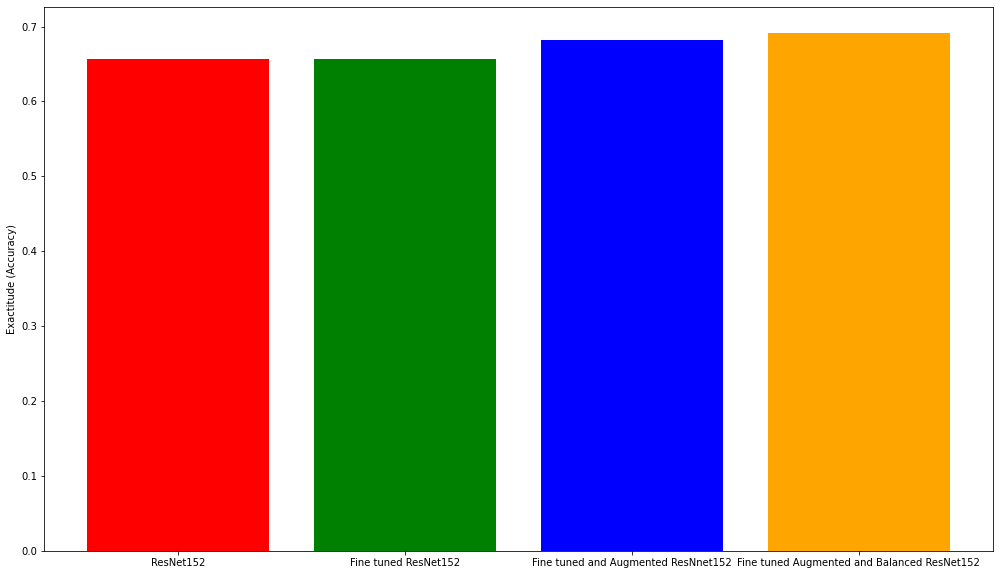

In [13]:
# Define the colors for each bar
colors = ['red', 'green', 'blue', 'orange']

# Extract the model names and accuracy values
model_names = list(accs.keys())
accuracy_values = list(accs.values())

# Set a larger figure size to create more space
plt.figure(figsize=(17, 10))

# Plot the bar plot
plt.bar(model_names, accuracy_values, color=colors)
xlabel = 'Models'
# Set labels and title
#plt.xlabel('Models')

#plt.xlabel('Les modèles')  # Increase the fontsize as needed

plt.ylabel('Exactitude (Accuracy)')
#plt.title('Accuracy Comparison')

# Show the plot
plt.show()